In [1]:
import pickle
import pandas as pd
import numpy as np
from torchmetrics.functional.text.rouge import rouge_score
from tqdm import tqdm

/var/folders/nv/z1jxx0450bl2tkfsvqfvmzz00000gn/T/ipykernel_90096/1126344167.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
with open("../../dataset/data_dict.pkl", "rb") as f:
    data_dict = pickle.load(f)
with open("../../dataset/split_homology_test_0.pkl", "rb") as f:
    hmg_dict = pickle.load(f)
metadata = pd.read_csv("../../dataset/split_0.csv")

In [4]:
df = metadata[metadata.split=="test"]
df.iloc[:10]

,uniprot_id,protein_length,uniref_id,split
1,Q07646,335,UniRef50_Q07646,test
5,Q9EWW3,105,UniRef50_Q9EWW3,test
10,Q54PH5,528,UniRef50_Q54PH5,test
16,Q75FU8,436,UniRef50_Q75FU8,test
19,Q9HLE5,268,UniRef50_Q9HLE5,test
26,A5FH28,356,UniRef50_A5FH28,test
28,Q2TBK4,278,UniRef50_Q8BHX1,test
40,O19901,293,UniRef50_O19901,test
60,Q6ZM63,285,UniRef50_Q9UHW5,test
63,Q9H672,318,UniRef50_Q9H672,test


In [14]:
scores = {}
for i, r in tqdm(df.iterrows(), total=len(df)):
    uid, _, cid, _ = r
    scores[uid] = 0
    s1 = data_dict[uid]['sequence']
    s2s = [data_dict[hmg_dict[uid][i]]['sequence'] for i in range(min(10, len(hmg_dict[uid])))]
    for ss in s2s:
        score = rouge_score(s1, ss, tokenizer=list, rouge_keys="rougeL")['rougeL_fmeasure'].item()
        if score > scores[uid]:
            scores[uid] = score
        if score > 0.6:
            break

100%|██████████| 17552/17552 [1:30:32<00:00,  3.23it/s]  


In [18]:
with open("split_0_closest_homologue_sim_score.pkl", "wb") as f:
    pickle.dump(scores, f)

In [17]:
for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    print(i, len([k for k, v in scores.items() if v <= i]))
len(scores)

0.1 22
0.2 60
0.3 187
0.4 1239
0.5 4298
0.6 8576


17552

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f9afc164f10>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f9afc164e80>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f9afe7e2110>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f9afe7e0850>}

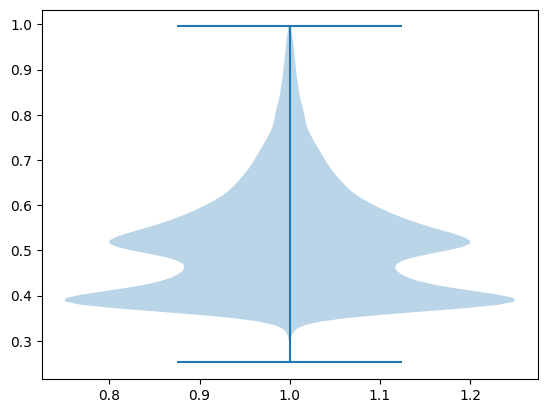

In [19]:
with open("test_sim_scores.pkl", "rb") as f:
    _sc = pickle.load(f)
plt.violinplot(_sc.values())

In [22]:
min(_sc.values())

0.25208085775375366

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f9ae8c14af0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f9ae8c14bb0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f9ae8b0fc10>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f9ae8b0f820>}

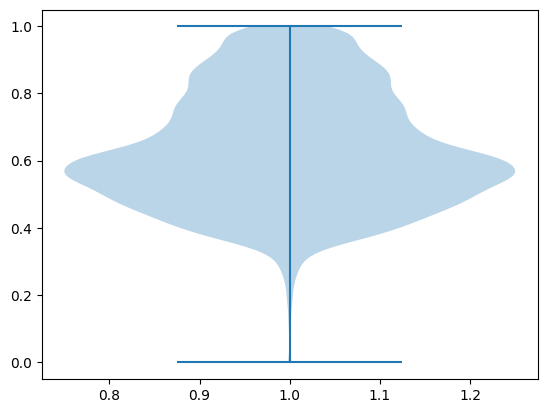

In [15]:
import matplotlib.pyplot as plt

plt.violinplot(scores.values())